In [1]:
import pandas as pd 
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
filtered_df_sport_category = pd.read_parquet('filtered_sport_category_without_description_column_metadata.parquet')

In [3]:
filtered_df_sport_category['upload_date'] = pd.to_datetime(filtered_df_sport_category['upload_date'])
filtered_df_sport_category['year'] = filtered_df_sport_category['upload_date'].dt.year
filtered_df_sport_category['month'] = filtered_df_sport_category['upload_date'].dt.month
filtered_df_sport_category['day'] = filtered_df_sport_category['upload_date'].dt.day


Add imaginary time, so we don't need to do a groupby (because there are multiple videos per day)

In [4]:
# filtered_df_sport_category['upload_date'] = filtered_df_sport_category['upload_date'] + pd.to_timedelta(np.arange(len(filtered_df_sport_category)) % (24 * 60), unit='m')

## Analysis on superbowl

In [5]:
superbowl_df = filtered_df_sport_category[
    filtered_df_sport_category.apply(lambda row: 'superbowl' in row['tags'].lower() or 'superbowl' in row['title'].lower() or 'super bowl' in row['tags'] or 'super bowl' in row['title'], axis=1)
]
superbowl_df

categories                channel_id                  crawl_date  \
1907        Sports  UCzR0IZSjOCkrRhDxED3_GmA  2019-11-03 06:55:01.751983   
4451        Sports  UCzR0IZSjOCkrRhDxED3_GmA  2019-11-03 06:56:31.143174   
6059        Sports  UCzQr2dWkS6T6xHRqYOMxQ7A  2019-11-08 04:54:38.109413   
6060        Sports  UCzQr2dWkS6T6xHRqYOMxQ7A  2019-11-08 04:54:38.730386   
6061        Sports  UCzQr2dWkS6T6xHRqYOMxQ7A  2019-11-08 04:54:39.254045   
...            ...                       ...                         ...   
4338412     Sports  UCsD-Qms-AkXDrsU962OicLw  2019-11-01 10:35:55.494911   
4349160     Sports  UCs4TGanvFtdeg4E4Muggm9g  2019-11-11 21:52:42.159084   
4349161     Sports  UCs4TGanvFtdeg4E4Muggm9g  2019-11-11 21:52:42.733279   
4349163     Sports  UCs4TGanvFtdeg4E4Muggm9g  2019-11-11 21:52:43.940632   
4353709     Sports  UCs0pWdCLhGfkbmwRVySM31w  2019-11-22 21:38:21.930996   

         dislike_count   display_id  duration  like_count  \
1907               0.0  4vlxep8VQX4       121         6.0   
4451               0.0  VIB-0f1wM4U       137         2.0   
6059              14.0  rPd-W_vs5Us       489        98.0   
6060              19.0  k7YPK1r2ewA       385       406.0   
6061               3.0  J_fKZa3flhA        35        66.0   
...                ...          ...       ...         ...   
4338412           35.0  aY6GTSDYDRo       412       658.0   
4349160            0.0  G0WWbkyh0ZM       118         3.0   
4349161            0.0  hVk113FlV30         5         2.0   
4349163            0.0  npN3iOxMzPc        15         2.0   
4353709            8.0  Yki7gyALZJc       754       324.0   

                                                      tags  \
1907     National Signing Day,Philadelphia Eagles,Super...   
4451     rivals.com,national signing day,super bowl 50,...   
6059     super bowl 53 trophy presentation,mvp,super bo...   
6060     superbowl 53,nfl,sports,football,tom brady,pat...   
6061     superbowl 53,nfl,sports,football,tom brady,pat...   
...                                                    ...   
4338412  fan,sports,superbowl,team,superfans,superfan,s...   
4349160  fort worth,nfl,patriots,pick,rams,super bowl,t...   
4349161  superbowl,football,nfl,dallas,2019,super bowl,...   
4349163  tony romo,cbs,super bowl XXIII,romo,dallas cow...   
4353709  crappie,slabs,hogs,fish,fisherman,white,black,...   

                                                     title upload_date  \
1907     Super Bowl Champs tell their National Signing ...  2018-02-05   
4451        Super Bowl players relive National Signing Day  2016-02-02   
6059               Super Bowl 53 Trophy Presentation & MVP  2019-02-03   
6060        Super Bowl 53 Final Minutes | Patriots Vs Rams  2019-02-03   
6061         Jared Goff Get's Intercepted In Super Bowl 53  2019-02-03   
...                                                    ...         ...   
4338412  Superfans: The Tribalism of Sports | Annals of...  2018-02-01   
4349160  Gus the Fort Worth gorilla picks Super Bowl LI...  2019-02-01   
4349161  What did Tony Romo say to Cowboys fans who wan...  2019-01-31   
4349163  Tony Romo says he is happy at CBS and lucky to...  2019-01-30   
4353709           FISHING A PRIVATE LAKE (for big crappie)  2019-02-03   

         view_count  year  month  day  
1907          240.0  2018      2    5  
4451          531.0  2016      2    2  
6059         5473.0  2019      2    3  
6060        49156.0  2019      2    3  
6061         7051.0  2019      2    3  
...             ...   ...    ...  ...  
4338412     32875.0  2018      2    1  
4349160       282.0  2019      2    1  
4349161       233.0  2019      1   31  
4349163        95.0  2019      1   30  
4353709      7287.0  2019      2    3  

[14511 rows x 14 columns]

### Word cloud

In [6]:
from wordcloud import WordCloud
from collections import Counter


def create_word_cloud(df, column, split_char=','):
    # Combine all tags into a single list
    all_values_column = [tag for sublist in df[column].str.split(
        split_char).tolist() for tag in sublist]

    # Count the frequency of each tag
    tag_counts = Counter(all_values_column)

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400,
                        background_color='white').generate_from_frequencies(tag_counts)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

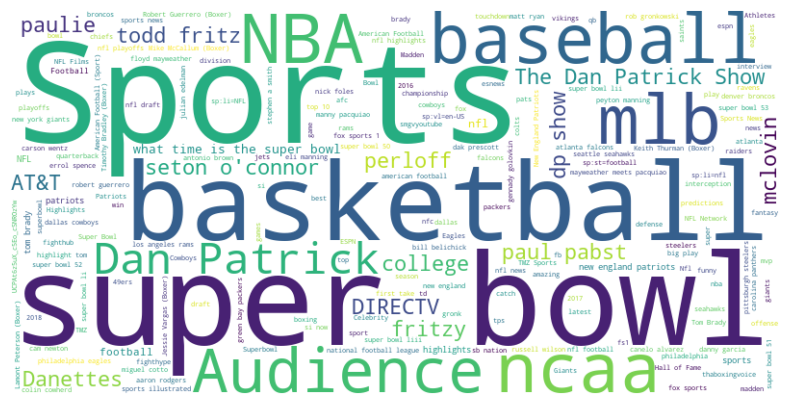

In [7]:
create_word_cloud(superbowl_df, 'tags')

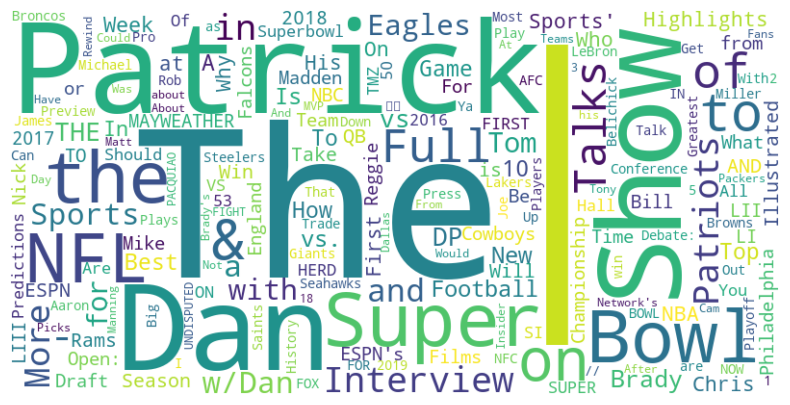

In [8]:
create_word_cloud(superbowl_df, 'title', " ")

### Graphs

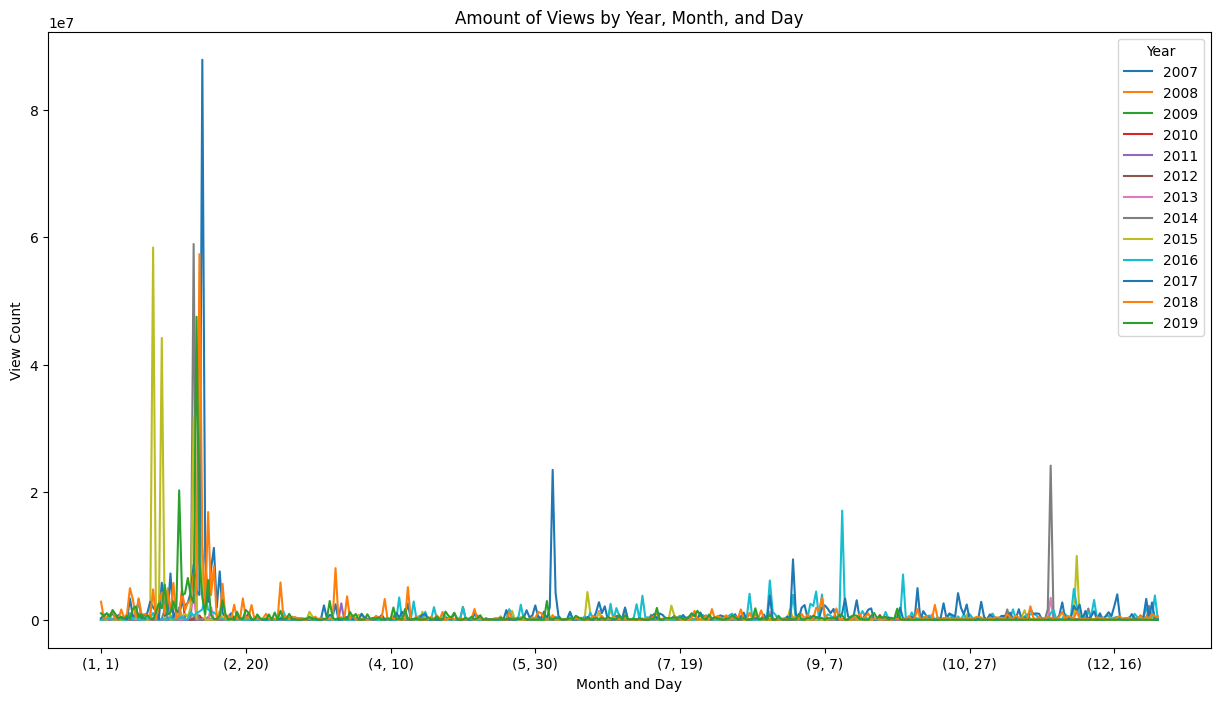

In [9]:
# Group by year, month, and day and sum the view counts
grouped_df = superbowl_df.groupby(['year', 'month', 'day'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months/days as rows
pivot_df = grouped_df.pivot_table(index=['month', 'day'], columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

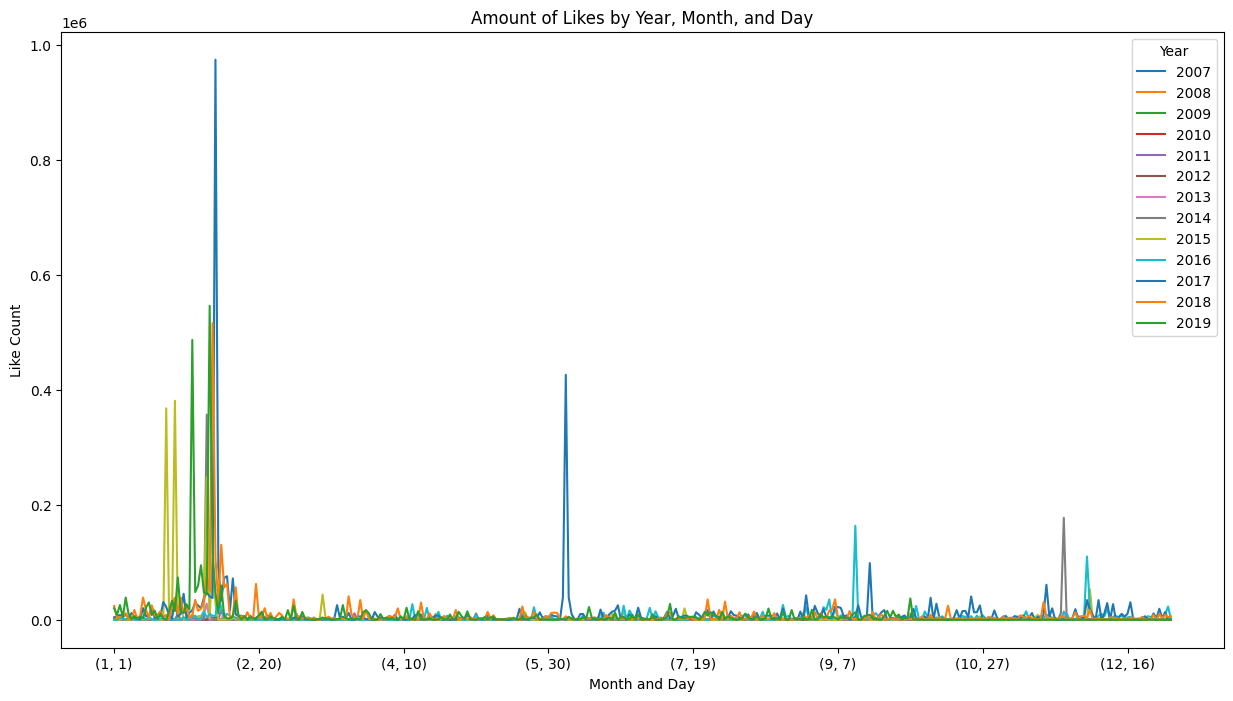

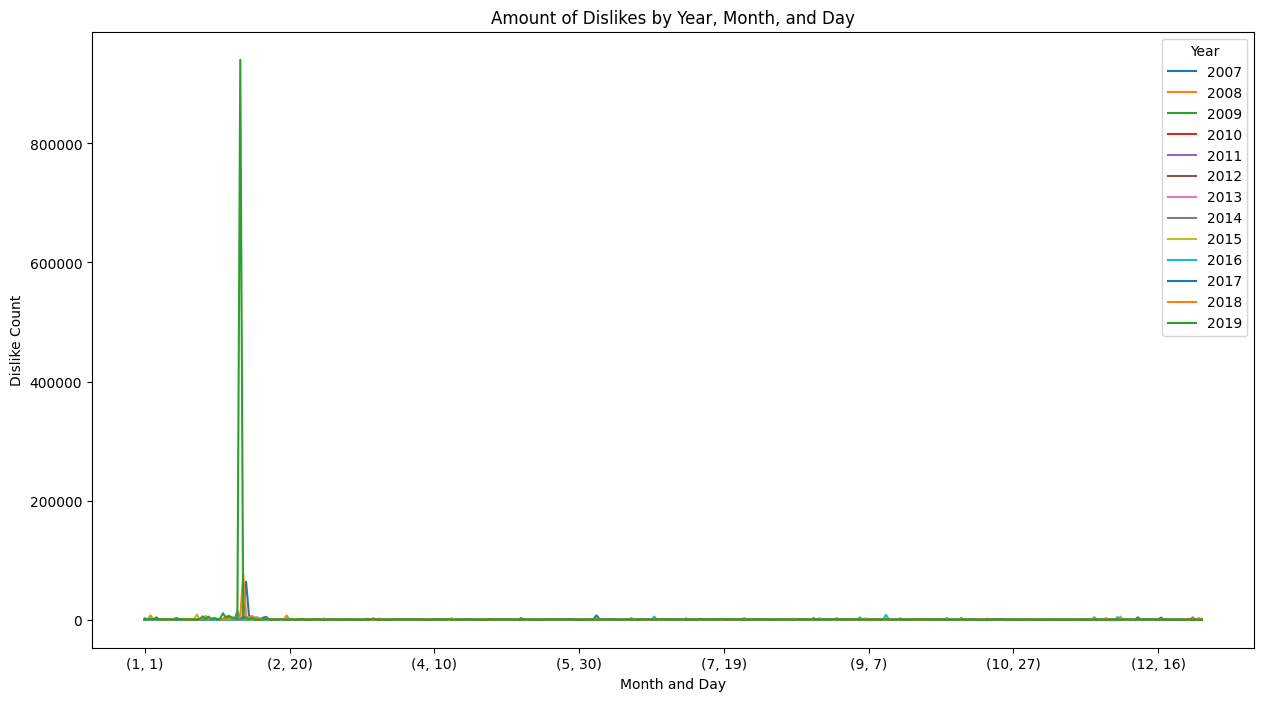

In [10]:
# Group by year, month, and day and sum the like and dislike counts
likes_dislikes_df = superbowl_df.groupby(['year', 'month', 'day'])[['like_count', 'dislike_count']].sum().reset_index()

# Pivot the table to have years as columns and months/days as rows for likes
pivot_likes_df = likes_dislikes_df.pivot_table(index=['month', 'day'], columns='year', values='like_count', fill_value=0)

# Pivot the table to have years as columns and months/days as rows for dislikes
pivot_dislikes_df = likes_dislikes_df.pivot_table(index=['month', 'day'], columns='year', values='dislike_count', fill_value=0)

# Plot the data for likes
pivot_likes_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Likes by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('Like Count')
plt.legend(title='Year')
plt.show()

# Plot the data for dislikes
pivot_dislikes_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Dislikes by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('Dislike Count')
plt.legend(title='Year')
plt.show()

/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_620/1793023564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superbowl_df['year_month'] = superbowl_df['year'].astype(str) + '-' + superbowl_df['month'].astype(str).str.zfill(2)


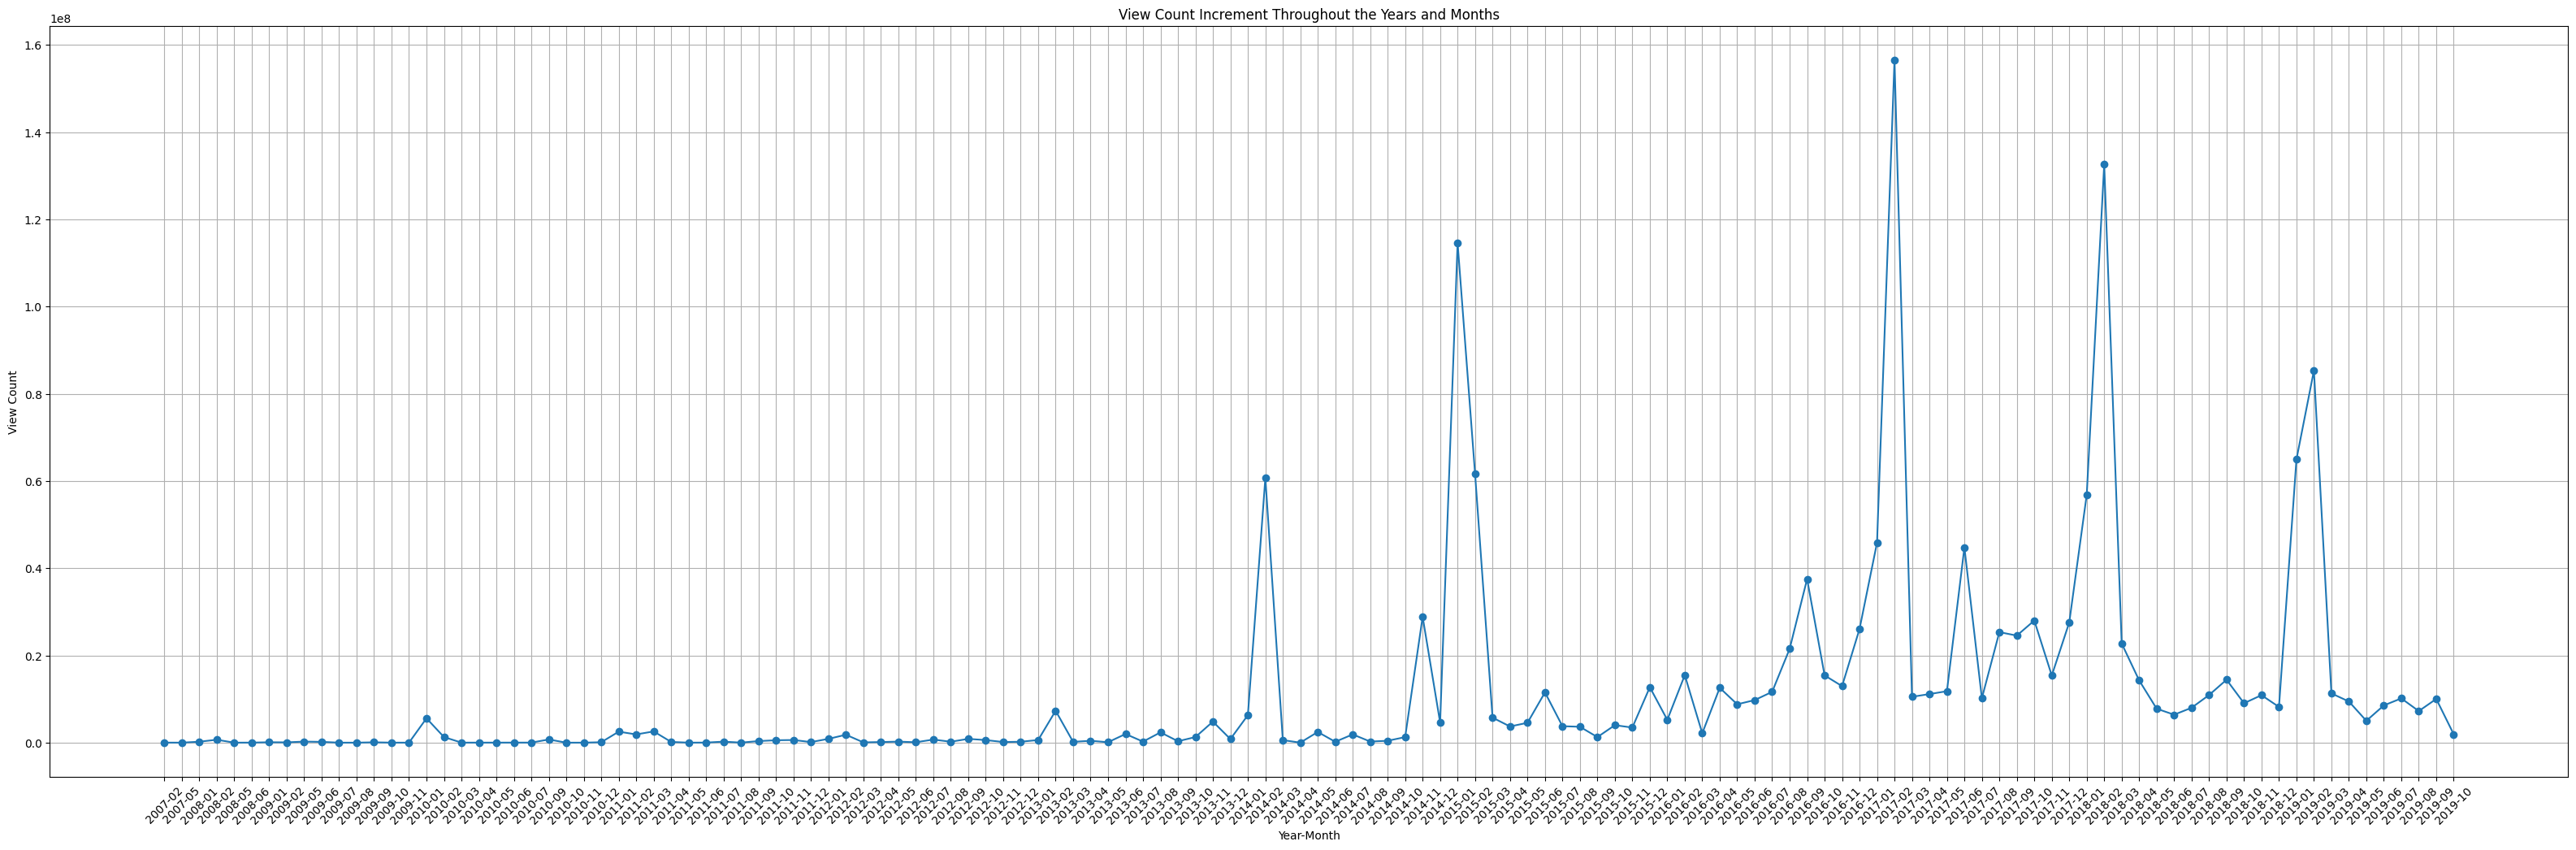

In [11]:
# Create a new column that combines year and month
superbowl_df['year_month'] = superbowl_df['year'].astype(str) + '-' + superbowl_df['month'].astype(str).str.zfill(2)

# Group by the new 'year_month' column and sum the view counts
year_month_view_count = superbowl_df.groupby('year_month')['view_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(40, 12))
plt.plot(year_month_view_count['year_month'], year_month_view_count['view_count'], marker='o')
plt.title('View Count Increment Throughout the Years and Months')
plt.xlabel('Year-Month')
plt.ylabel('View Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

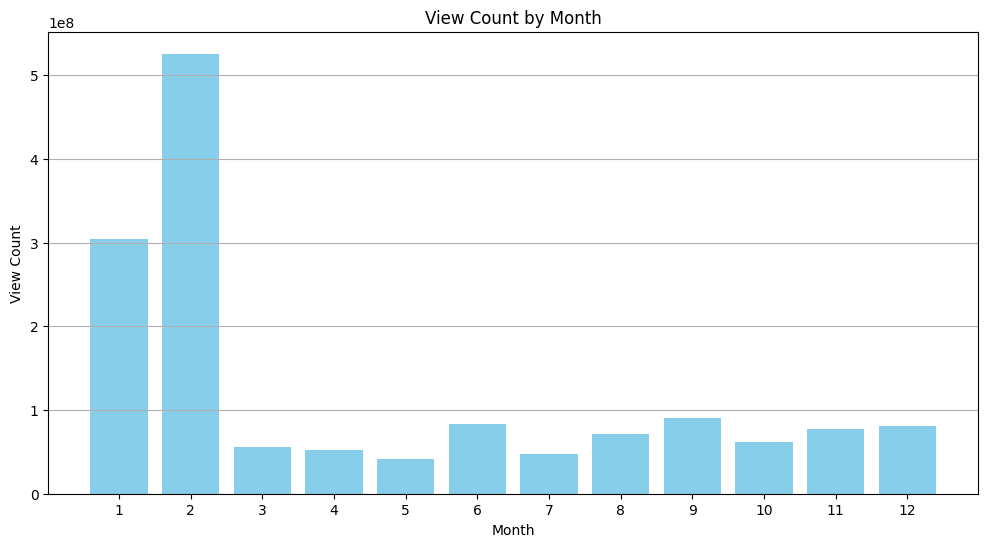

In [12]:
monthly_data = superbowl_df.groupby('month')['view_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(monthly_data['month'], monthly_data['view_count'], color='skyblue')
plt.title('View Count by Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.xticks(monthly_data['month'])
plt.grid(axis='y')
plt.show()

## Analysis on NFL

In [13]:
nfl_df = filtered_df_sport_category[
    filtered_df_sport_category.apply(lambda row: 'nfl' in row['tags'].lower().split(",") or 'nfl' in row['title'].lower().split(" "), axis=1)
]
nfl_df

categories                channel_id                  crawl_date  \
1063        Sports  UCzSSoloGEz10HALUAbYhngQ  2019-11-13 01:14:39.285922   
1271        Sports  UCzR0IZSjOCkrRhDxED3_GmA  2019-11-03 06:54:44.909158   
1310        Sports  UCzR0IZSjOCkrRhDxED3_GmA  2019-11-03 06:54:44.419621   
1311        Sports  UCzR0IZSjOCkrRhDxED3_GmA  2019-11-03 06:54:44.977420   
1314        Sports  UCzR0IZSjOCkrRhDxED3_GmA  2019-11-03 06:54:46.159880   
...            ...                       ...                         ...   
4349655     Sports  UCs4TGanvFtdeg4E4Muggm9g  2019-11-11 21:56:24.627275   
4349679     Sports  UCs4TGanvFtdeg4E4Muggm9g  2019-11-11 21:56:02.892317   
4349686     Sports  UCs4TGanvFtdeg4E4Muggm9g  2019-11-11 21:56:34.390091   
4349687     Sports  UCs4TGanvFtdeg4E4Muggm9g  2019-11-11 21:55:58.802218   
4349688     Sports  UCs4TGanvFtdeg4E4Muggm9g  2019-11-11 21:56:01.622975   

         dislike_count   display_id  duration  like_count  \
1063               3.0  HtyQEdOlE24       191        15.0   
1271               0.0  JpS9SMrFaOo        84        20.0   
1310               0.0  a1728HyUf34       168         2.0   
1311               1.0  HXRjieyWuMk        96        37.0   
1314               0.0  cf39TgufQX4       102        20.0   
...                ...          ...       ...         ...   
4349655            0.0  dLO_u9CzJAI       285         2.0   
4349679            0.0  _hoEyOJjZZE       325         0.0   
4349686            0.0  SxhYCvSUiUA        45         0.0   
4349687            0.0  4ChlhwfF4p0       128         0.0   
4349688            0.0  noi0YpnmMZE       261         1.0   

                                                      tags  \
1063     sport,moments,crazy,extreme,adrenaline,brave,n...   
1271     Julian Love,Notre Dame,Fighting Irish,NFL,NFL ...   
1310     Oklahoma State,Cowboys,Tulsa,Rivals,2019 NFL D...   
1311     Greg Little,Gregory Little,Ole Miss,Rebels,Off...   
1314     Rebels,Hotty Toddy,Ole Miss,Mississippi,SEC,Wi...   
...                                                    ...   
4349655  Star-Telegram,randy galloway,mac engel,dallas ...   
4349679  randy galloway,dallas cowboys,mac engel,jerry ...   
4349686                                 Dallas,Cowboys,NFL   
4349687  Dallas Cowboys NFL football Fort Worth Star-Te...   
4349688  dallas cowboys,fort worth star-telegram,tony r...   

                                                     title upload_date  \
1063          BEST REACTIONS TO EAGLES SUPER BOWL WIN 2018  2018-02-05   
1271     Look Back: Notre Dame CB Julian Love - New Yor...  2019-01-07   
1310     Rivals Rewind: Jordan Brailford - High school ...  2018-12-27   
1311     2019 NFL Draft || Greg Little - Carolina Panth...  2018-12-26   
1314         2019 NFL Draft: A.J. Brown - Tennessee Titans  2018-12-26   
...                                                    ...         ...   
4349655        Galloway and Big Mac: Cowboys still average  2013-09-03   
4349679    Galloway and Big Mac: A glimmer of Cowboys hope  2013-07-30   
4349686  Jason Garrett on Dallas Cowboys conditioning test  2013-07-21   
4349687  Dallas Cowboys Host Youth Coaches At Cowboys S...  2013-07-18   
4349688  Galloway and Big Mac: Camp, Cowboys and questions  2013-07-17   

         view_count  year  month  day  
1063         2453.0  2018      2    5  
1271         2094.0  2019      1    7  
1310          249.0  2018     12   27  
1311         5625.0  2018     12   26  
1314         1739.0  2018     12   26  
...             ...   ...    ...  ...  
4349655       991.0  2013      9    3  
4349679       499.0  2013      7   30  
4349686       848.0  2013      7   21  
4349687       674.0  2013      7   18  
4349688       696.0  2013      7   17  

[159247 rows x 14 columns]

### Word cloud

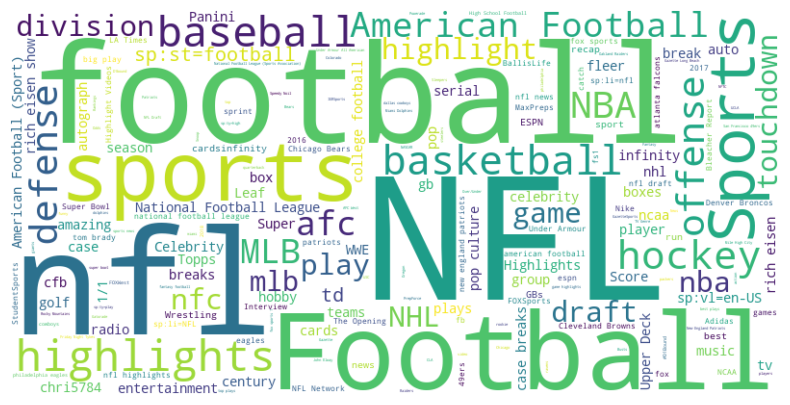

In [14]:
create_word_cloud(nfl_df, 'tags')

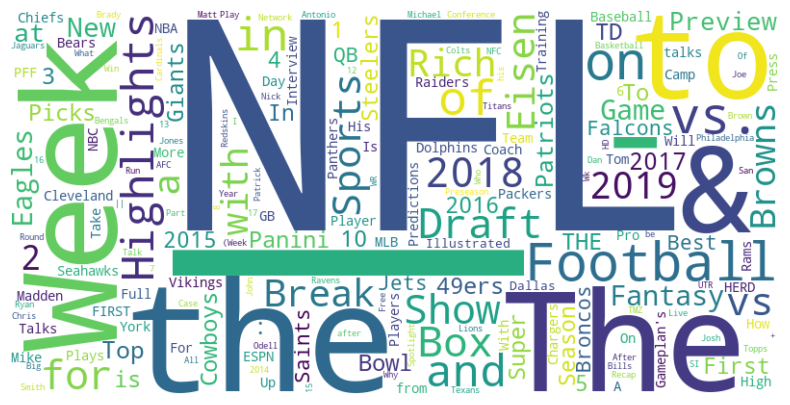

In [15]:
create_word_cloud(nfl_df, 'title', " ")

### Graphs

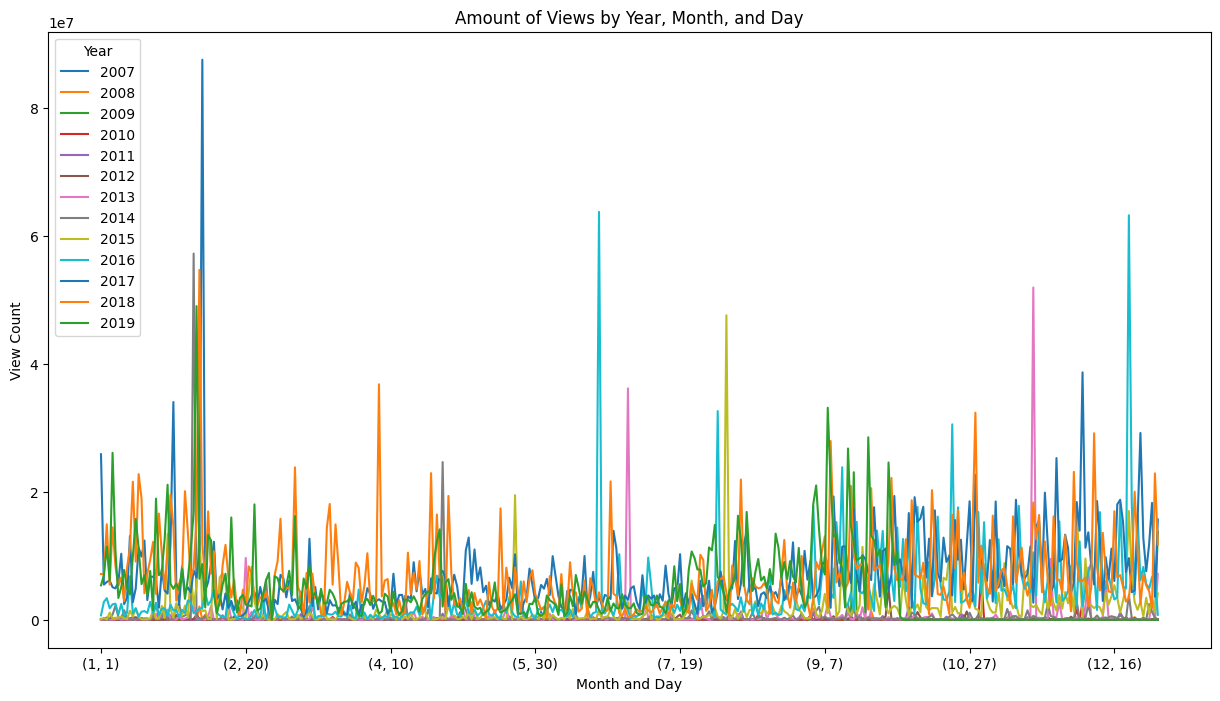

In [16]:
# Group by year, month, and day and sum the view counts
grouped_df = nfl_df.groupby(['year', 'month', 'day'])['view_count'].sum().reset_index()

# Pivot the table to have years as columns and months/days as rows
pivot_df = grouped_df.pivot_table(index=['month', 'day'], columns='year', values='view_count', fill_value=0)

# Plot the data
pivot_df.plot(kind='line', figsize=(15, 8))
plt.title('Amount of Views by Year, Month, and Day')
plt.xlabel('Month and Day')
plt.ylabel('View Count')
plt.legend(title='Year')
plt.show()

/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_620/4023069648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_df['year_month'] = nfl_df['year'].astype(str) + '-' + nfl_df['month'].astype(str).str.zfill(2)


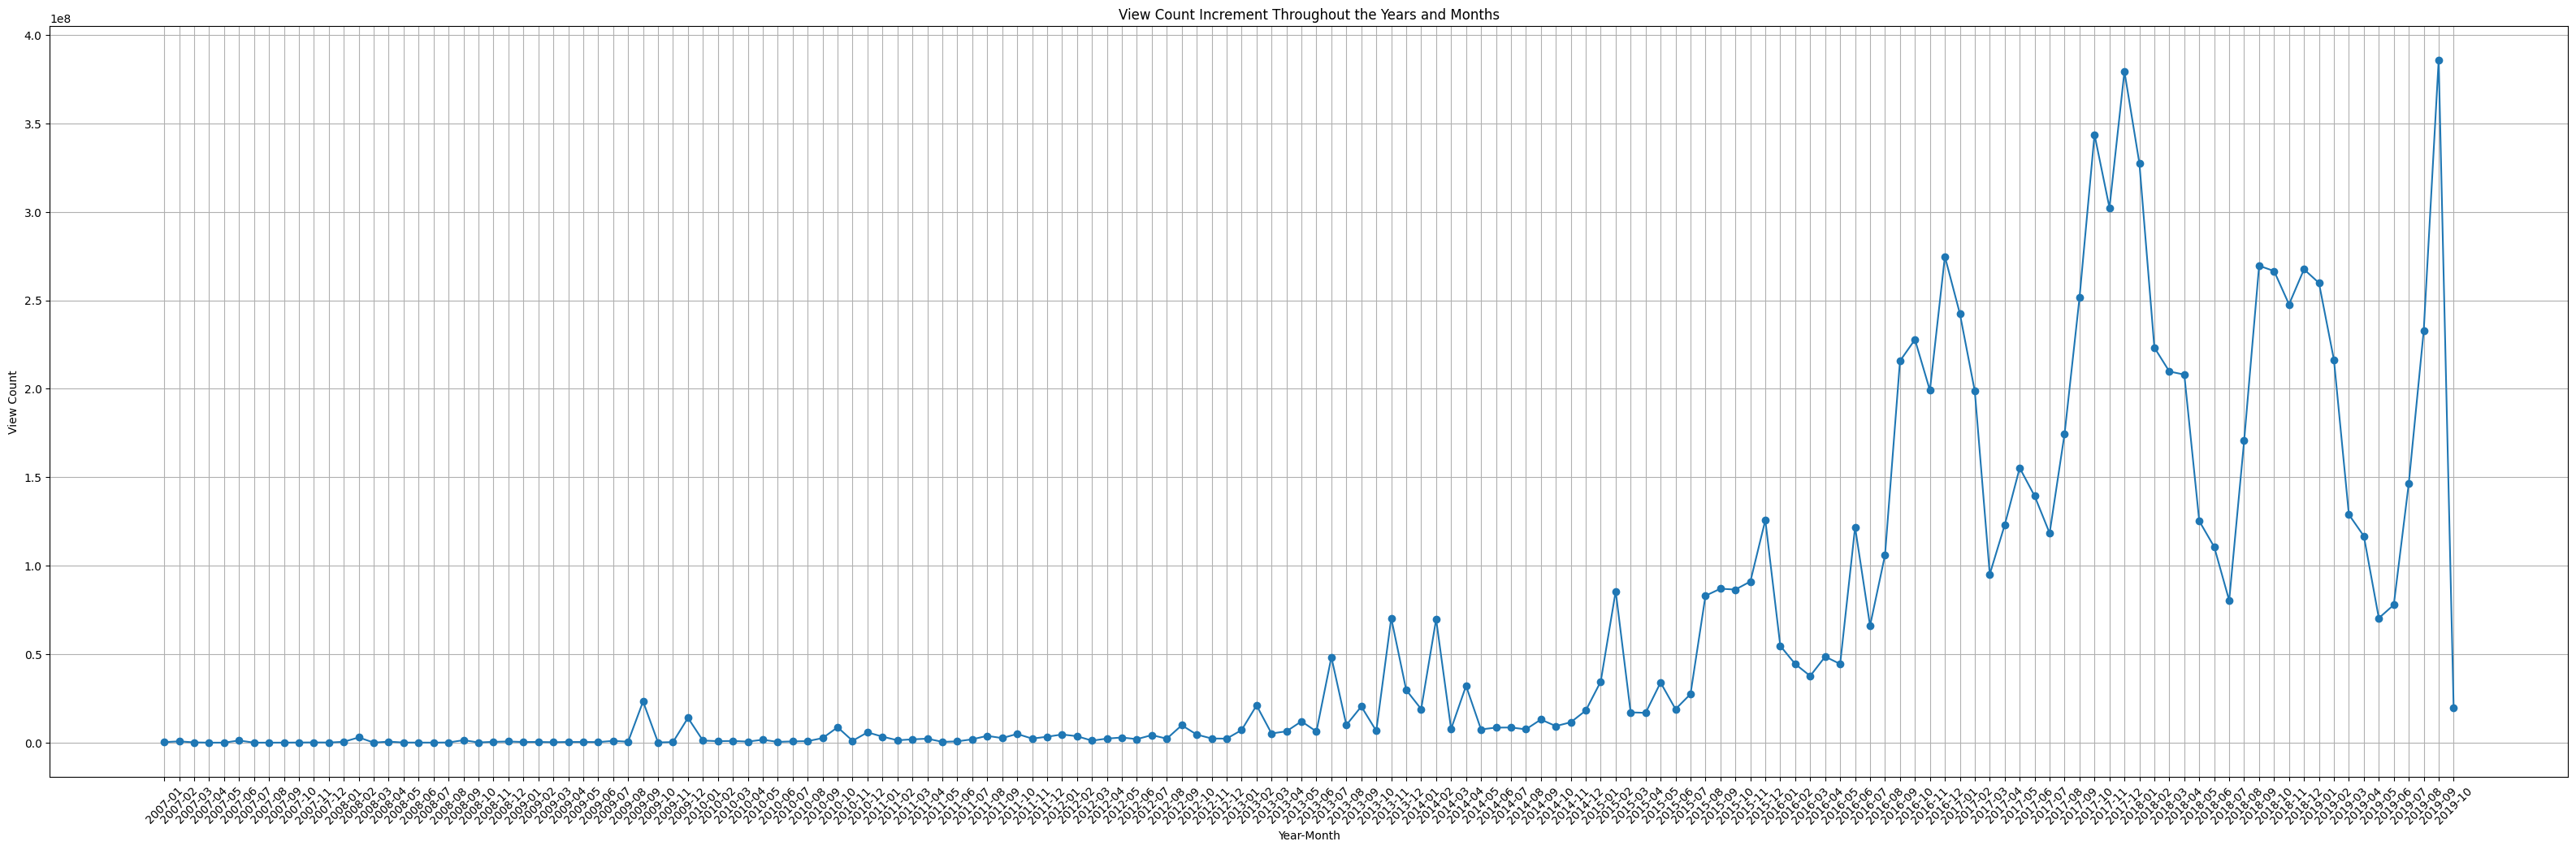

In [17]:
# Create a new column that combines year and month
nfl_df['year_month'] = nfl_df['year'].astype(str) + '-' + nfl_df['month'].astype(str).str.zfill(2)

# Group by the new 'year_month' column and sum the view counts
year_month_view_count = nfl_df.groupby('year_month')['view_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(40, 12))
plt.plot(year_month_view_count['year_month'], year_month_view_count['view_count'], marker='o')
plt.title('View Count Increment Throughout the Years and Months')
plt.xlabel('Year-Month')
plt.ylabel('View Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

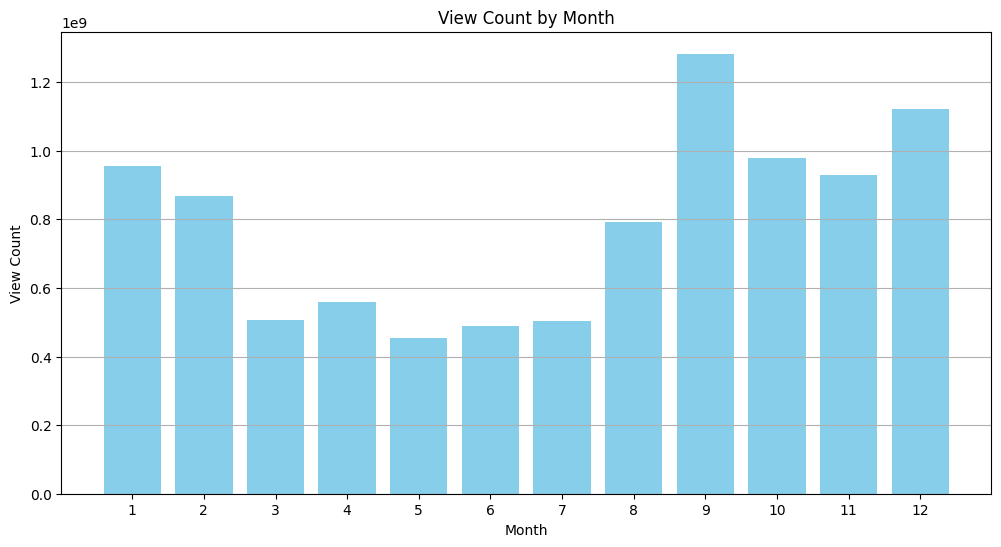

In [18]:
monthly_data = nfl_df.groupby('month')['view_count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(monthly_data['month'], monthly_data['view_count'], color='skyblue')
plt.title('View Count by Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.xticks(monthly_data['month'])
plt.grid(axis='y')
plt.show()

In [19]:
filtered_df_sport_category.isna().sum()

categories           0
channel_id           0
crawl_date           0
dislike_count    56782
display_id           0
duration             0
like_count       56782
tags                 0
title                0
upload_date          0
view_count           2
year                 0
month                0
day                  0
dtype: int64

## Analysis on american football

In [20]:
american_football_df = filtered_df_sport_category[
    filtered_df_sport_category.apply(lambda row: 'american football' in row['tags'].lower().split(",") or 'american football' in row['title'].lower().split(" "), axis=1)
]

american_football_df

categories                channel_id                  crawl_date  \
4745        Sports  UCzR0IZSjOCkrRhDxED3_GmA  2019-11-03 06:56:40.181106   
14519       Sports  UCzEPPYM7-et9T9160XHCrCg  2019-11-19 23:32:13.909881   
14521       Sports  UCzEPPYM7-et9T9160XHCrCg  2019-11-19 23:32:15.075869   
23100       Sports  UCruQg25yVBppUWjza8AlyZA  2019-10-30 19:40:33.007182   
26343       Sports  UCrnXgvpJ56xtqVvsKh8RYYw  2019-11-07 18:27:12.957468   
...            ...                       ...                         ...   
4325709     Sports  UCsMiwFQdEP5t_5a7CpGN7tQ  2019-10-31 01:16:16.726652   
4325770     Sports  UCsMiwFQdEP5t_5a7CpGN7tQ  2019-10-31 01:16:01.663058   
4338247     Sports  UCsEXpx8Ew8lQZYTMWu1Ep5g  2019-10-31 23:49:16.375834   
4338805     Sports  UCsBAxbLb2mixfuU6IYE__GA  2019-11-18 14:23:24.632855   
4338806     Sports  UCsBAxbLb2mixfuU6IYE__GA  2019-11-18 14:23:21.640542   

         dislike_count   display_id  duration  like_count  \
4745               0.0  9rNuTxypSWk       140         5.0   
14519             17.0  Sv6S3-4SAaA       376       593.0   
14521             13.0  t1Hz3hr0IFc       982       278.0   
23100           2139.0  Jajxv4IuWZ0       172     23790.0   
26343              0.0  _ys1JQt4oRM       179        34.0   
...                ...          ...       ...         ...   
4325709            3.0  iwEtzDFmCw0        67        41.0   
4325770           18.0  cYJ2AEsrQ3U       561       314.0   
4338247          478.0  85zFpCq5kzY       201     14738.0   
4338805           11.0  AEVg79RlzZk       767       753.0   
4338806           24.0  xcuKdYb8zUI       790      1042.0   

                                                      tags  \
4745     Football (Interest),under armour,american foot...   
14519    Football,American Football,NFL,Football hits,A...   
14521    American Football,Football,React,Reaction,Reac...   
23100    FOX,KDFW,Dallas,Fort,Worth,Good,Day,Texas,News...   
26343    shoulders,weightlifting,american football,pres...   
...                                                    ...   
4325709  transworld sport,football,rugby,cricket,NFL,ba...   
4325770  Samoa (Country),Samoan football,American footb...   
4338247  Interception,Return,Pick 6,Pick Six,Deion Sand...   
4338805  dre drizzle,nfl,nfl combine,sports,dre,dreandk...   
4338806  dredrizzle,college football,touchdowns,people ...   

                                                     title upload_date  \
4745                     RCS Cleveland: OL vs. DL part one  2015-04-30   
14519    Biggest American Football Hits Ever: Reaction ...  2017-06-02   
14521    Greatest Trick Plays in American Football Hist...  2017-06-01   
23100    Targeted HS Football Player Attacked And Choke...  2018-09-26   
26343    How to continue building muscle...Change it up!!!  2011-05-19   
...                                                    ...         ...   
4325709        Sanya Richards Breaks Aaron Ross NCAA Ring!  2013-04-29   
4325770  American Samoan High School Football on Trans ...  2012-11-05   
4338247                               Best Pick Sixes Ever  2016-02-14   
4338805  Fastest 40 Yard Dash Time Ever!?! Trying Out F...  2017-03-31   
4338806  INSANE KICKING CHALLENGE WITH DEESTROYING!! HI...  2017-01-15   

         view_count  year  month  day  
4745         1221.0  2015      4   30  
14519       43199.0  2017      6    2  
14521       21748.0  2017      6    1  
23100     4862328.0  2018      9   26  
26343        1430.0  2011      5   19  
...             ...   ...    ...  ...  
4325709     12546.0  2013      4   29  
4325770     63714.0  2012     11    5  
4338247   3790205.0  2016      2   14  
4338805     23887.0  2017      3   31  
4338806     53734.0  2017      1   15  

[21445 rows x 14 columns]

### Word cloud

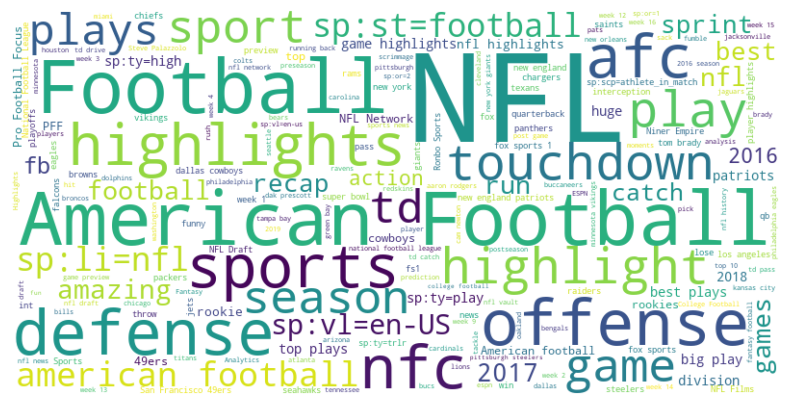

In [21]:
create_word_cloud(american_football_df, 'tags', ",")

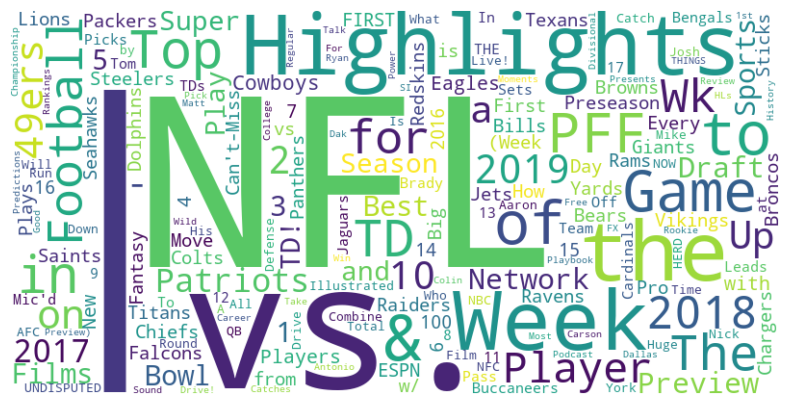

In [22]:
create_word_cloud(american_football_df, 'title', " ")

### Graphs

In [23]:
def graph_timeseries_all_time(df):
    # Create a new column that combines year and month
    df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

    # Group by the new 'year_month' column and sum the view counts
    year_month_view_count = df.groupby('year_month')['view_count'].sum().reset_index()

    # Plot the data
    plt.figure(figsize=(40, 12))
    plt.plot(year_month_view_count['year_month'], year_month_view_count['view_count'], marker='o')
    plt.title('View Count Increment Throughout the Years and Months')
    plt.xlabel('Year-Month')
    plt.ylabel('View Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

/var/folders/dy/b1b3v71j30715q_7sr29yn6h0000gn/T/ipykernel_620/1801571280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)


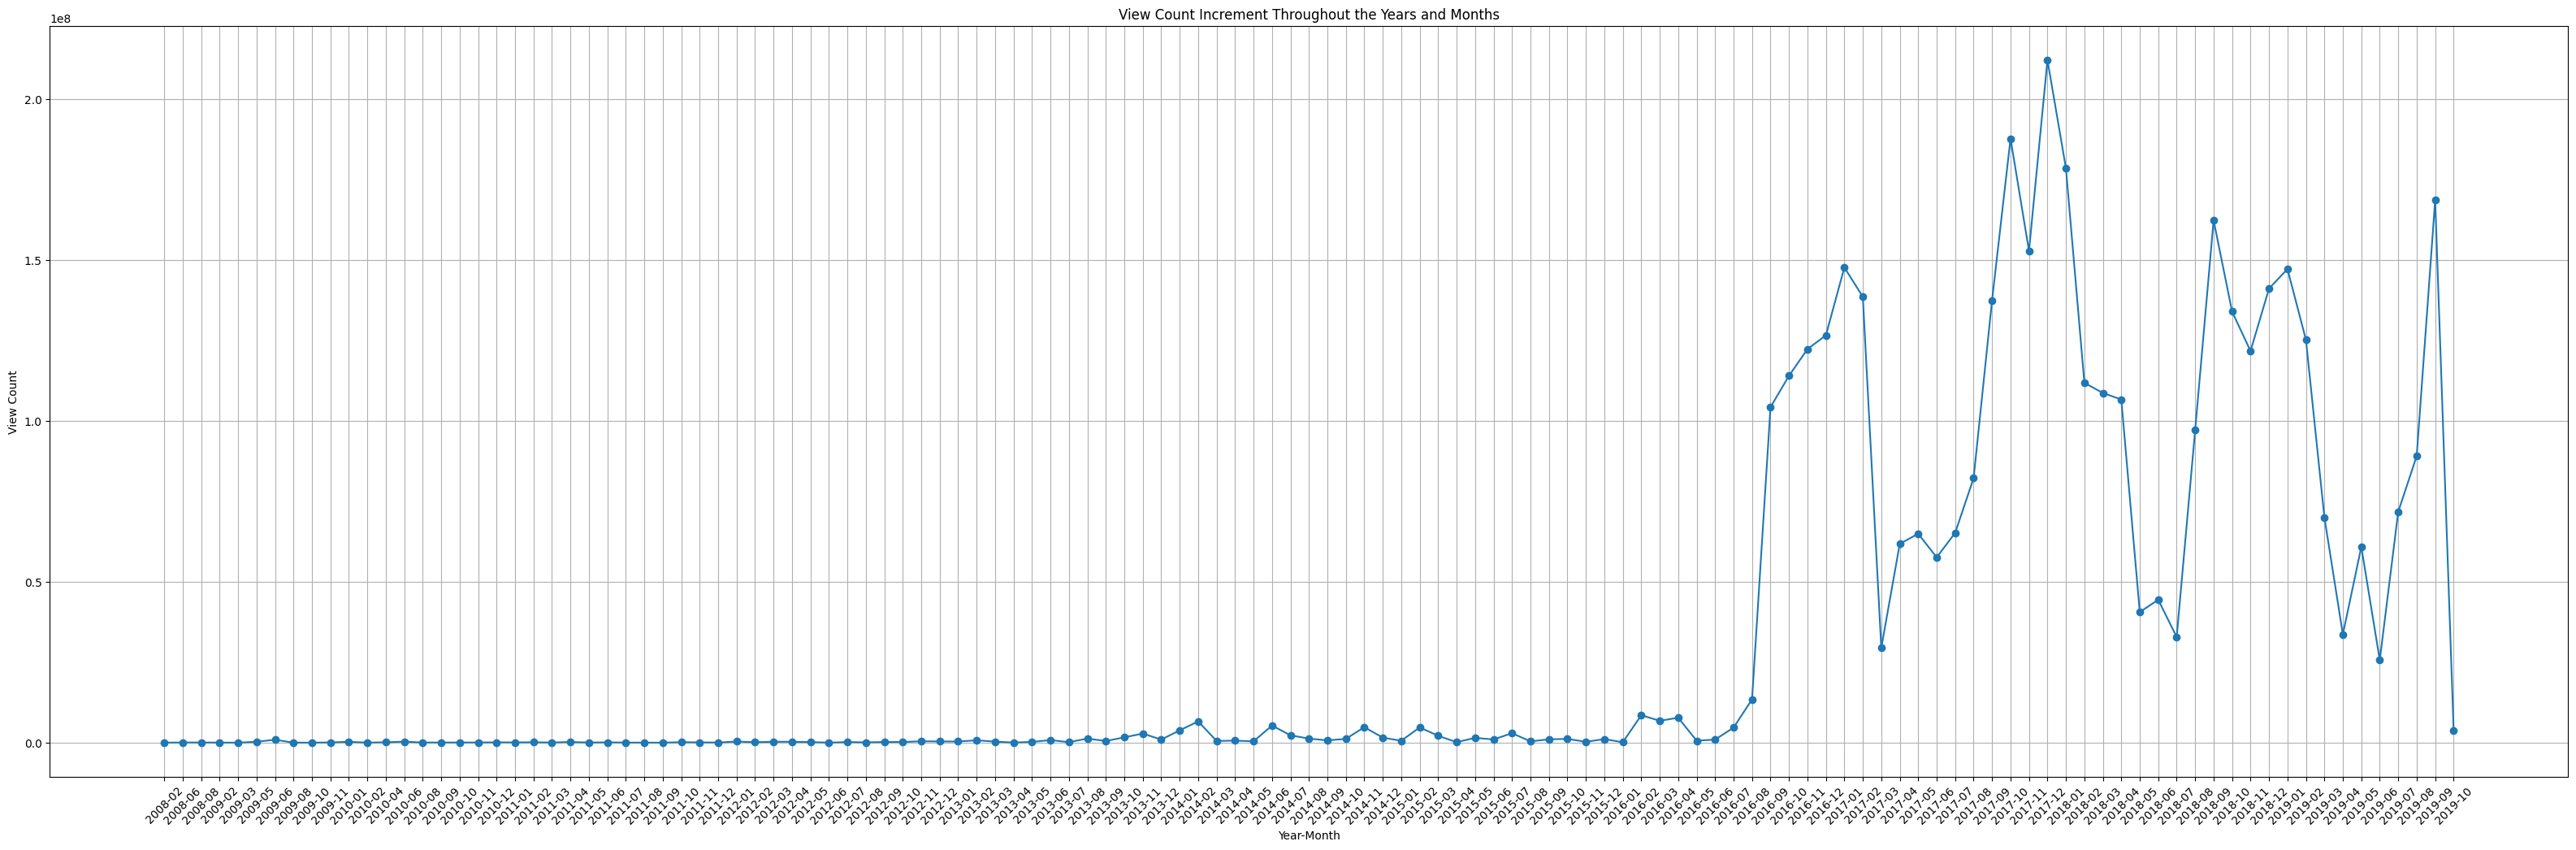

In [24]:
graph_timeseries_all_time(american_football_df)

In [25]:
def graph_groupby_time(df):
    # Group by year, month, and day and sum the view counts
    grouped_df = df.groupby(['year', 'month', 'day'])['view_count'].sum().reset_index()

    # Pivot the table to have years as columns and months/days as rows
    pivot_df = grouped_df.pivot_table(index=['month', 'day'], columns='year', values='view_count', fill_value=0)

    # Plot the data
    pivot_df.plot(kind='line', figsize=(15, 8))
    plt.title('Amount of Views by Year, Month, and Day')
    plt.xlabel('Month and Day')
    plt.ylabel('View Count')
    plt.legend(title='Year')
    plt.show()

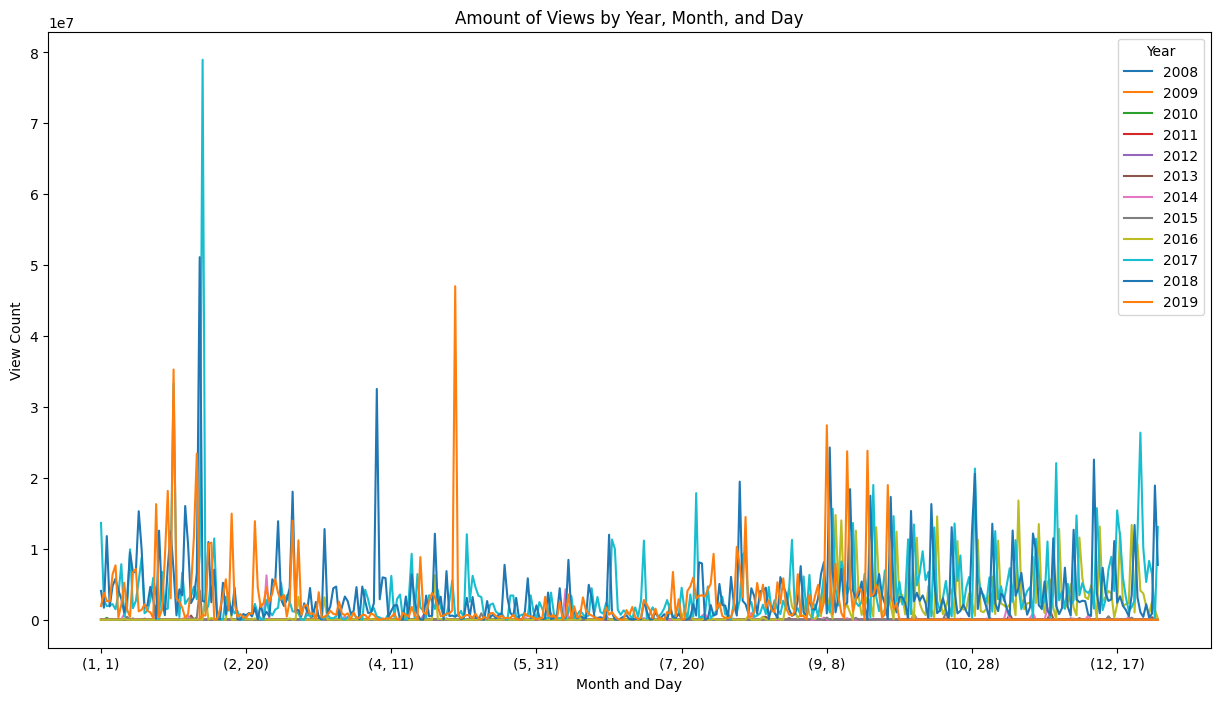

In [26]:
graph_groupby_time(american_football_df)

In [27]:
def graph_bar_plot_time(df, date_type="month"):
    time_data = df.groupby(['year', date_type])['view_count'].sum().reset_index()

    # Create a pivot table to have years as columns and months as rows
    pivot_data = time_data.pivot(index=date_type, columns='year', values='view_count').fillna(0)

    # Plot the data
    pivot_data.plot(kind='bar', figsize=(15, 8))
    plt.title(f'View Count by {date_type} for Each Year')
    plt.xlabel(f'{date_type.capitalize()}')
    plt.ylabel('View Count')
    plt.xticks(rotation=0)
    plt.legend(title='Year')
    # plt.yscale('log')
    plt.grid(axis='y')
    plt.show()

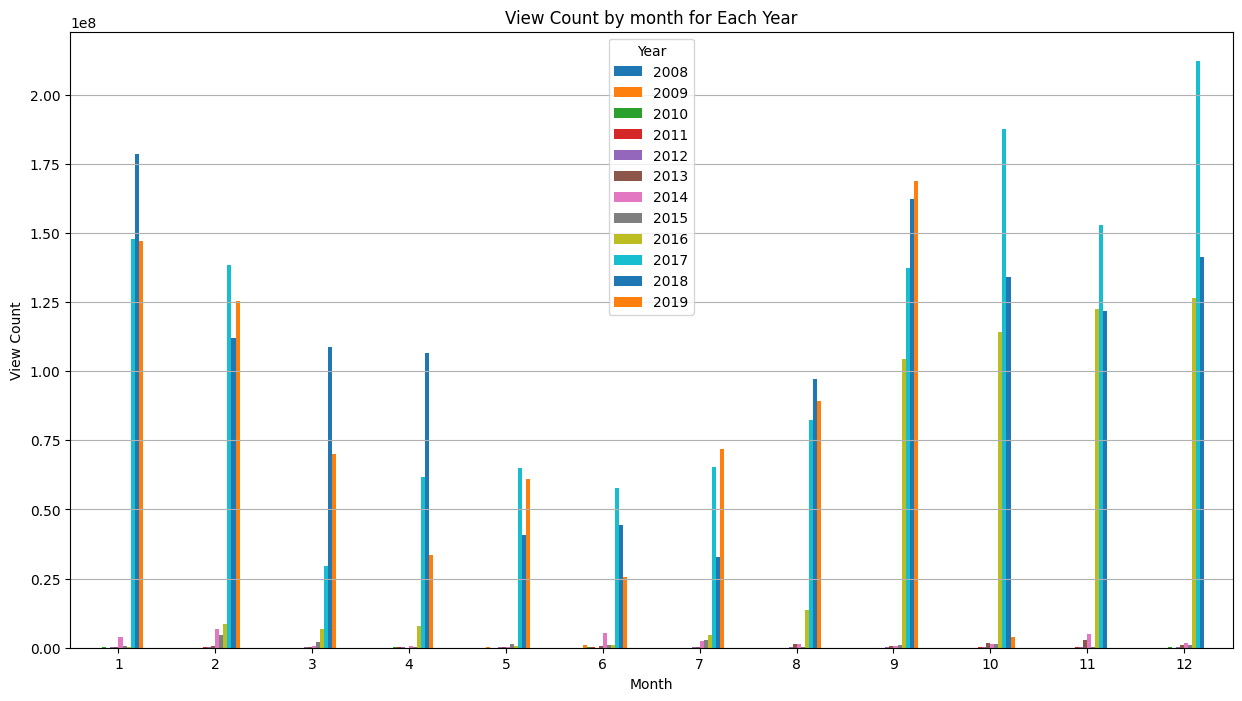

In [28]:
graph_bar_plot_time(american_football_df)

In [29]:
ejfoqiwjef

NameError: name 'ejfoqiwjef' is not defined

In [ ]:
def dif_in_dif(df_timeseries, treatment_date, x_column, bool_treatment_list):    
    # Create a binary treatment indicator, (is someting general, not only is_sports)
    df_timeseries['is_sports'] = np.where(bool_treatment_list, 1, 0)
    # df_timeseries['is_sports'] = np.where(df_timeseries['category'] == 'Sports', 1, 0)

    # Define treatment date (modify as per your specific analysis)
    treatment_date = pd.to_datetime(treatment_date)

    # Create a binary time indicator
    df_timeseries['post_treatment'] = np.where(df_timeseries['upload_date'] >= treatment_date, 1, 0)

    # Create interaction term
    df_timeseries['interaction'] = df_timeseries['is_sports'] * df_timeseries['post_treatment']

    # Perform DiD regression
    model = smf.ols(f"{x_column} ~ is_sports + post_treatment + interaction", data=df_timeseries).fit()

    # Print regression summary
    print(model.summary())

    # Create summary for visualization
    summary = df_timeseries.groupby(['post_treatment', 'is_sports'])[x_column].mean().reset_index()
    summary['Group'] = summary['is_sports'].apply(lambda x: 'Sports' if x == 1 else 'Control')
    summary['Period'] = summary['post_treatment'].apply(lambda x: 'Post-Treatment' if x == 1 else 'Pre-Treatment')

    # Bar Plot
    plt.figure(figsize=(8,6))
    sns.barplot(x='Period', y=x_column, hue='Group', data=summary)
    plt.title(f'Average {x_column} by Group and Period')
    plt.ylabel(f'Average {x_column}')
    plt.show()

    # Time Series Plot
    time_summary = df_timeseries.groupby(['upload_date', 'is_sports'])[x_column].mean().reset_index()

    time_summary['Group'] = time_summary['is_sports'].apply(lambda x: 'Sports' if x == 1 else 'Control')

    # Plot
    plt.figure(figsize=(14,7))
    sns.lineplot(x='upload_date', y=x_column, hue='Group', data=time_summary, marker='o')
    plt.axvline(x=treatment_date, color='red', linestyle='--', label='Treatment Date')
    plt.title(f'{x_column} Over Time by Group')
    plt.xlabel('Date')
    plt.ylabel(f'Average {x_column}')
    plt.legend()
    plt.show()

                            OLS Regression Results                            
Dep. Variable:             view_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     36.22
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           2.12e-23
Time:                        17:00:01   Log-Likelihood:            -6.5102e+07
No. Observations:             4354410   AIC:                         1.302e+08
Df Residuals:                 4354406   BIC:                         1.302e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.781e+04    517.539    111.

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

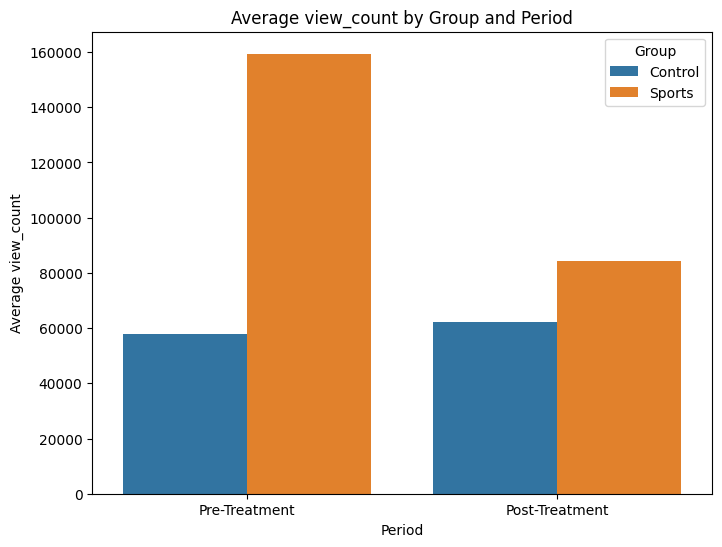

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

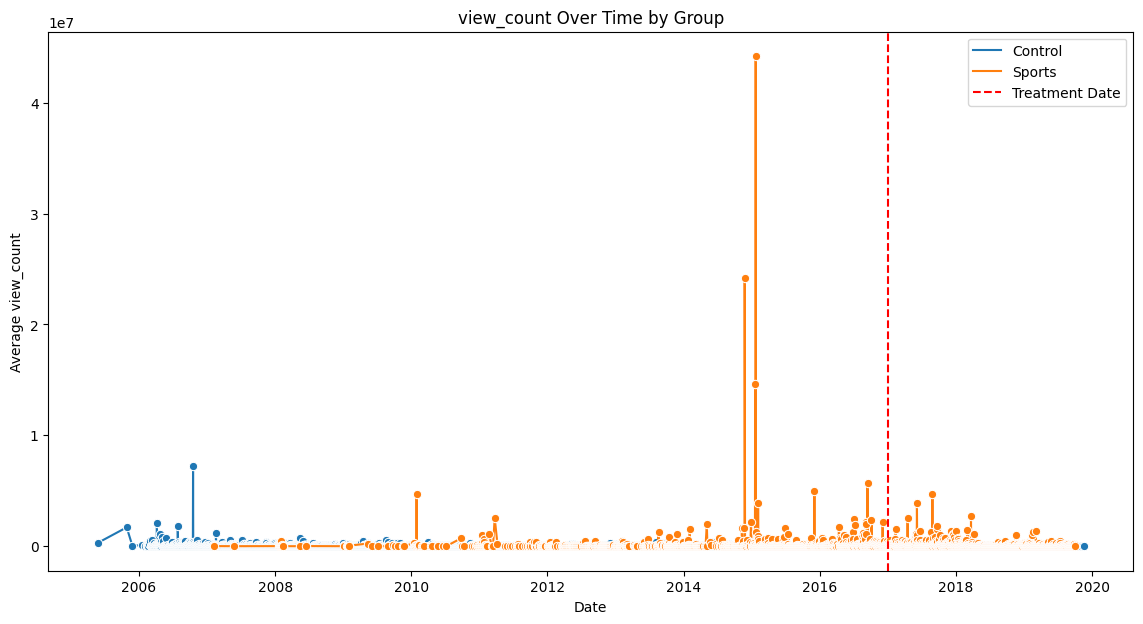

In [ ]:
bool_treatment_list = filtered_df_sport_category.apply(lambda row: 'superbowl' in row['tags'].lower() or 'superbowl' in row['title'].lower() or 'super bowl' in row['tags'] or 'super bowl' in row['title'], axis=1)


dif_in_dif(filtered_df_sport_category, pd.to_datetime('2017-01-01'), 'view_count', bool_treatment_list)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates

def arima_event_impact(df, date_column, value_column, event_date, order=(1, 1, 1)):
    #
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Set the date column as the index
    df.set_index(date_column, inplace=True)
    
    # Fit the ARIMA model
    model = ARIMA(df[value_column], order=order)
    model_fit = model.fit()
    
    # Forecast the values
    forecast = model_fit.get_forecast(steps=30)
    forecast_index = pd.date_range(start=df.index[-1], periods=30, freq='D')
    forecast_values = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df[value_column], label='Historical Data')
    plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
    plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
    plt.axvline(pd.to_datetime(event_date), color='green', linestyle='--', label='Event Date')
    plt.title('Impact of Event on Time Series')
    plt.xlabel('Date')
    plt.ylabel(value_column)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provid

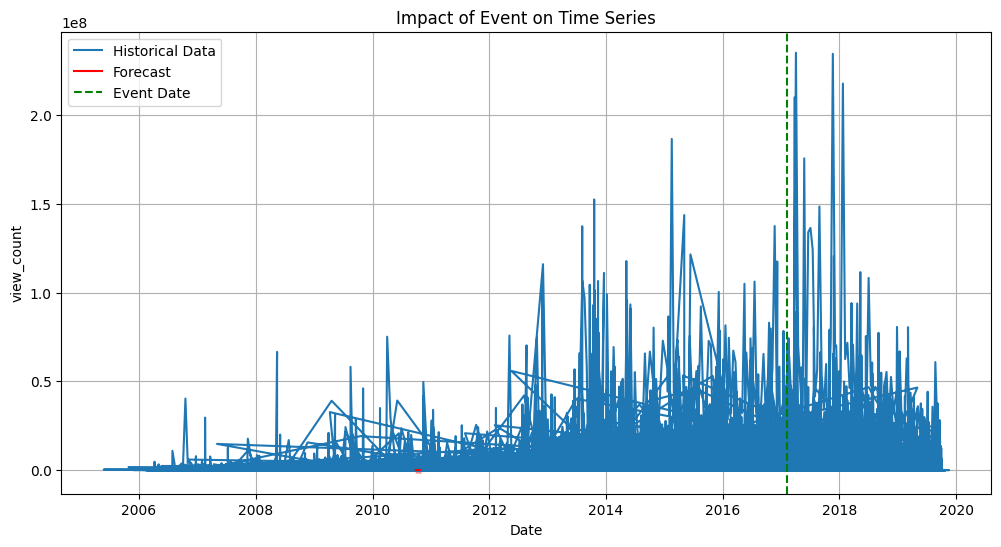

In [ ]:
arima_event_impact(filtered_df_sport_category, 'upload_date', 'view_count', '2017-02-06', order=(1, 1, 1))

### Check for seasonality

How to test the impact of an external event on a time series?
- You should test first the hypothesis you mention with a structural break test (there various test you should try several). If your hypothesis turns out to be correct then you should introduce a structural break in your regression in order to correct. Moreover, if you think the event is likely to occur again in the future a sophisticated way to treat the problem is using a Markov Switching Model.
- doing a time series regression with dummy variables for the event.



To perform linear time regression to measure the impact of an event using Python, you can follow these steps:
- Prepare the data
- Create the regression model
- Fit the model and interpret results

Here's a detailed guide with Python code:

Data Preparation

```python
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'date', 'value', and 'event'
# 'event' should be a binary column (0 before the event, 1 after)

# Create a time variable (days since start)
df['time'] = (df['date'] - df['date'].min()).dt.days

# Create interaction term
df['time_after_event'] = df['time'] * df['event']

```

Create and Fit the Model

Now, create and fit the linear regression model:

```python
# Prepare X and y
X = df[['time', 'event', 'time_after_event']]
y = df['value']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print results
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
```

Interpret Results

The coefficients can be interpreted as follows:
- model.coef_: Pre-event time trend
- model.coef_[1]: Immediate change in level after the event
- model.coef_[2]: Change in slope after the event

Visualize Results

To visualize the results:

```python
# Generate predictions
df['predicted'] = model.predict(X)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df['time'], df['value'], color='blue', label='Actual')
plt.plot(df['time'], df['predicted'], color='red', label='Predicted')
plt.axvline(x=df[df['event'] == 1]['time'].min(), color='green', linestyle='--', label='Event')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Impact of Event on Time Series')
plt.show()
```

Additional Considerations
Check for autocorrelation: Time series data often violates the independence assumption of OLS. You can use the Durbin-Watson test to check for autocorrelation2.
Handle seasonality: If your data has seasonal patterns, include seasonal dummy variables in your model4.
Model diagnostics: Examine residuals for normality and homoscedasticity.
Robustness checks: Consider alternative specifications or different time windows around the event.
Advanced techniques: For more complex scenarios, consider using interrupted time series analysis or ARIMA models1.
Remember that this simple linear regression approach assumes a constant trend before and after the event. If this assumption is violated, you may need to use more sophisticated techniques3.
By following these steps and considering the nuances of your specific data, you can effectively use linear time regression in Python to measure the impact of an event on your time series data.

In [30]:
# We have multiple videos in a day, but we don't really care about the order of those videos, so it shouldn't be a problem for the arima, it could also be possible to a sum of the view_count for each day (and maybe that could be better, but there shouldn't be a big difference)

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates
import statsmodels.api as sm

def check_impact_of_event_arima(df_timeseries, treatment_date, event_column="upload_date", x_column="view_count", bool_treatment_list=None, months_you_want_to_check_impact=3):
    start_date = treatment_date - pd.DateOffset(months=months_you_want_to_check_impact)
    end_date = treatment_date + pd.DateOffset(months=months_you_want_to_check_impact)
    
    df = df_timeseries[(df_timeseries[event_column] >= start_date) & (df_timeseries[event_column] <= end_date)].copy()

    df['treatment'] = df[event_column].apply(lambda x: 1 if x >= treatment_date else 0)

    # We don't use the bool_treatment_list for this function in the end
    if bool_treatment_list is None:
        raise ValueError("bool_treatment_list cannot be None")
    
    # fit arima with treatment
    model = ARIMA(df[x_column], exog=df['treatment'], order=(1, 1, 1))
    model_fit = model.fit()

    print(model_fit.summary())

    df['fitted'] = model_fit.predict()


    plt.plot(df.groupby(event_column)[x_column].sum(), label='Actual', color='blue')
    plt.plot(df.groupby(event_column)['fitted'].sum(), label='Fitted', color='red')
    plt.axvline(x=treatment_date, color='green', linestyle='--', label='Event Date')
    plt.xlabel('Date')
    plt.ylabel(x_column)
    plt.legend()
    plt.title(f'Impact of Event on {x_column}')
    plt.show()

    # Forecast future values
    forecast_steps = len(df[df[event_column] >= treatment_date])
    forecast = model_fit.get_forecast(steps=forecast_steps, exog=np.array([1] * forecast_steps))
    forecast_values = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps, freq='D')

    # Plot actual and forecasted values
    plt.plot(df.groupby(event_column)[x_column].sum(), label='Actual', color='blue')
    plt.plot(df.groupby(event_column)['fitted'].sum(), label='Fitted', color='red')

    # plot the residuals
    plt.fill_between(df.groupby(event_column)[event_column].max(), df.groupby(event_column)[x_column].sum(), df.groupby(event_column)['fitted'].sum(), color='gray', where=(df.groupby(event_column)[x_column].sum() > df.groupby(event_column)['fitted'].sum()), alpha=0.7, label='Positive Residuals', linewidth=3)

    plt.fill_between(df.groupby(event_column)[event_column].max(), df.groupby(event_column)[x_column].sum(), df.groupby(event_column)['fitted'].sum(), color='brown', where=(df.groupby(event_column)[x_column].sum() < df.groupby(event_column)['fitted'].sum()), alpha=0.7, label='Negative Residuals', linewidth=3)

    # check if the residuals had an impact with t-test

    residuals = df.groupby(event_column)[x_column].sum() - df.groupby(event_column)['fitted'].sum()
    
    # Filter residuals based on treatment condition
    residuals_pre_treatment = residuals[residuals.index < treatment_date]
    residuals_post_treatment = residuals[residuals.index >= treatment_date]
    
    # Ensure both lists have the same size
    min_length = min(len(residuals_pre_treatment), len(residuals_post_treatment))
    residuals_pre_treatment = residuals_pre_treatment[:min_length]
    residuals_post_treatment = residuals_post_treatment[:min_length]
    
    ttest = sm.stats.ttest_ind(residuals_pre_treatment, residuals_post_treatment)
    print(f"t-test, test statistic: {ttest[0]}, p-value: {ttest[1]}")
    if ttest[1] < 0.05:
        print("The event had an impact")
    else:
        print("The event did not have an impact")

    plt.axvline(x=treatment_date, color='green', linestyle='--', label='Event Date', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel(x_column)
    plt.legend()
    plt.title(f'Impact of Event on {x_column}')
    plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             view_count   No. Observations:                 3111
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -47725.606
Date:                Fri, 08 Nov 2024   AIC                          95459.212
Time:                        11:05:12   BIC                          95483.382
Sample:                             0   HQIC                         95467.890
                               - 3111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment  -3.715e+05   4.13e+04     -8.986      0.000   -4.52e+05    -2.9e+05
ar.L1          0.0396      0.010      4.129      0.000       0.021       0.058
ma.L1         -0.9879      0.005   -181.909      0.0

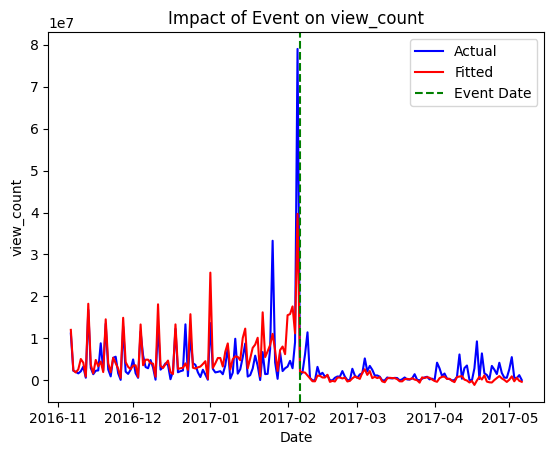

t-test, test statistic: -5.788551857169938, p-value: 3.145104176306892e-08
The event had an impact


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


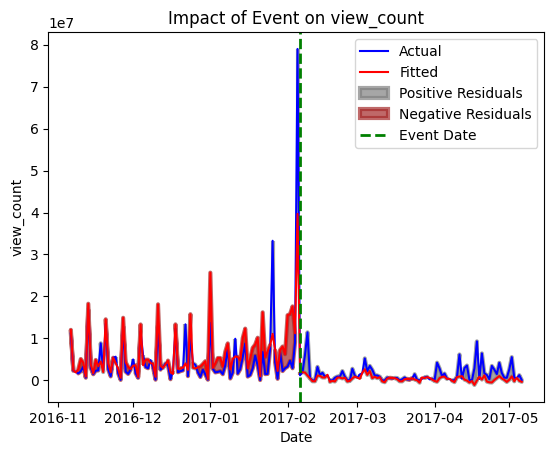

In [31]:
bool_treatment_list = american_football_df.apply(lambda row: 'superbowl' in row['tags'].lower(
) or 'superbowl' in row['title'].lower() or 'super bowl' in row['tags'] or 'super bowl' in row['title'], axis=1)

check_impact_of_event_arima(american_football_df, pd.to_datetime('2017-02-06'), 'upload_date', 'view_count', bool_treatment_list, months_you_want_to_check_impact=3)

/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             view_count   No. Observations:                 5807
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -87939.690
Date:                Fri, 08 Nov 2024   AIC                         175887.379
Time:                        11:05:13   BIC                         175914.046
Sample:                             0   HQIC                        175896.655
                               - 5807                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment   1.002e+05   3.33e+04      3.005      0.003    3.48e+04    1.66e+05
ar.L1          0.0514      0.005      9.429      0.000       0.041       0.062
ma.L1         -0.9866      0.002   -437.908      0.0

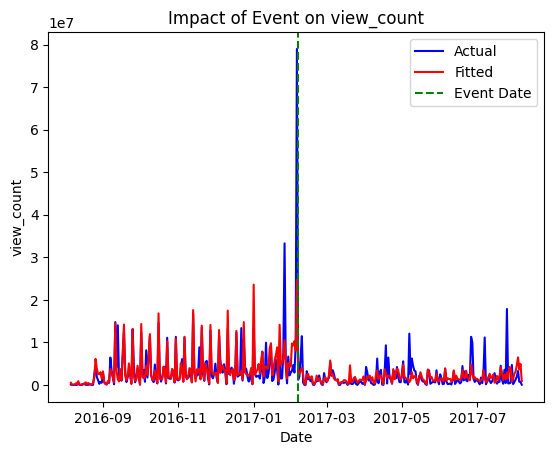

t-test, test statistic: -0.014634254613305763, p-value: 0.9883321229037163
The event did not have an impact


/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniforge/base/envs/torch/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


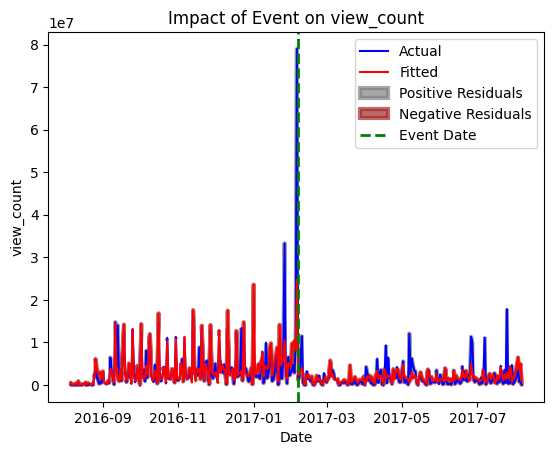

In [32]:
bool_treatment_list = american_football_df.apply(lambda row: 'superbowl' in row['tags'].lower(
) or 'superbowl' in row['title'].lower() or 'super bowl' in row['tags'] or 'super bowl' in row['title'], axis=1)

check_impact_of_event_arima(american_football_df, pd.to_datetime('2017-02-06'), 'upload_date', 'view_count', bool_treatment_list, months_you_want_to_check_impact=6)

To determine if an event had an impact on your time series, you can compare the forecasted values (from your ARIMA model, based on pre-event data) with the actual observed values post-event. This approach is often referred to as intervention analysis or impact assessment. Here’s a structured way to approach it:

Statistical Tests (Optional): Use statistical tests, such as the t-test or Cumulative Sum (CUSUM) test, to check if the residuals are significantly different from zero. Large, consistent deviations indicate that the event had an impact.